In [11]:
import os
os.chdir('C:/Users/HP/Desktop/Datasets')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

df = pd.read_csv('JNTU Sample data.csv')
print(df.columns)

Index(['State', 'Division', 'Region', 'Branch', 'RouteCode', 'VillageName',
       'pincode', 'CenterName', 'GroupName', 'Name', 'Loannature',
       'Employee_Name_for_clinet', 'Existing_Loan_amount', 'Loan_Date', 'AGE',
       'ID_DETAILS', 'ADHAAR_NUMBER', 'Marital_Status', 'INCOME_SOURCE',
       'LoanStatus'],
      dtype='object')


In [12]:
df['LoanStatus'].value_counts()

YES    5965
NO     2529
Name: LoanStatus, dtype: int64

E:\PYTHON_ANACONDA\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\PYTHON_ANACONDA\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\PYTHON_ANACONDA\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


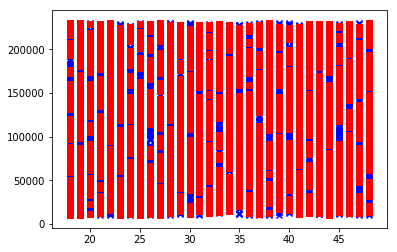

In [25]:
X = df[['Existing_Loan_amount','AGE']].values
y = df['LoanStatus'].values
y = np.where(y=='NO',-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
plt.scatter(df[df.LoanStatus=='YES']['AGE'].values,df[df.LoanStatus=='YES']['Existing_Loan_amount'].values,color  = 'b',marker = 'x')
plt.scatter(df[df.LoanStatus == 'NO']['AGE'].values,df[df.LoanStatus == 'NO']['Existing_Loan_amount'].values,color = 'r',marker = 's')
plt.show()

In [26]:
print(df[df.LoanStatus=='NO']['AGE'].values.size,df[df.LoanStatus=='NO']['Existing_Loan_amount'].values.size)

2529 2529


In [27]:
from sklearn.metrics import accuracy_score
svm = SVC(kernel = 'rbf',C = 10,random_state = 0,gamma = 0.2)
svm.fit(X_train_std,y_train)
y_test_pred = svm.predict(X_test_std)
print(accuracy_score(y_test,y_test_pred))

0.8146861820888117
